In [1]:
__file__ = 'A1.ipynb'
import sys
import pathlib
sys.path.append(str(pathlib.Path(__file__).absolute().parent.parent)+"/FP4_lib")
import functions as f
import os
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
from uncertainties import unumpy as up
from uncertainties import ufloat
import math as m

In [2]:
with open('Data/Aufg_5.4.txt','r') as tf:
    data = np.genfromtxt(tf).T
with open('Res/cp-cal_res.txt','r') as tf:
    cal = np.genfromtxt(tf).T

data = f.channel_to_pos(data,cal)

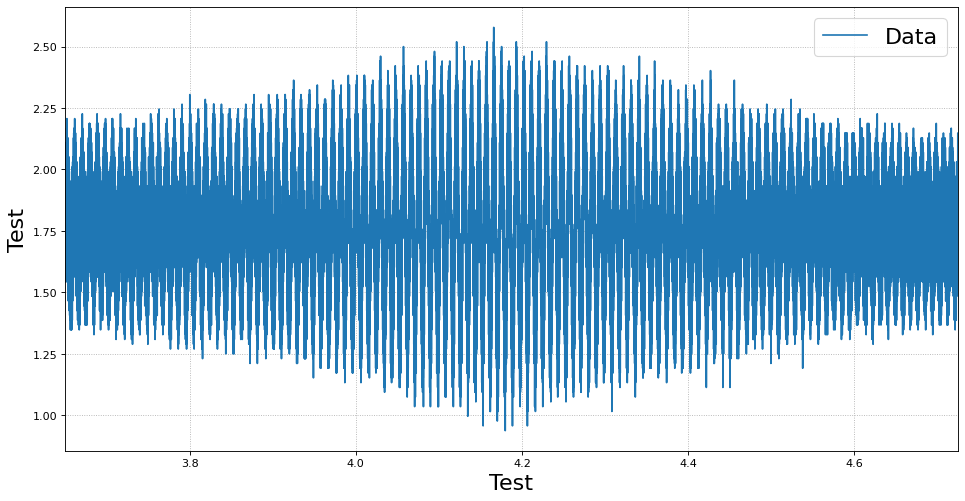

In [3]:
f.figsize(2)
plt.errorbar(data[0],data[1],label = 'Data')

f.form([3.650,4.725])

Wavelength: 3.6885711908825237e-06 m


/tmp/ipykernel_10152/723192191.py:20: RuntimeWarning: divide by zero encountered in divide
  freqs = 1/freqs


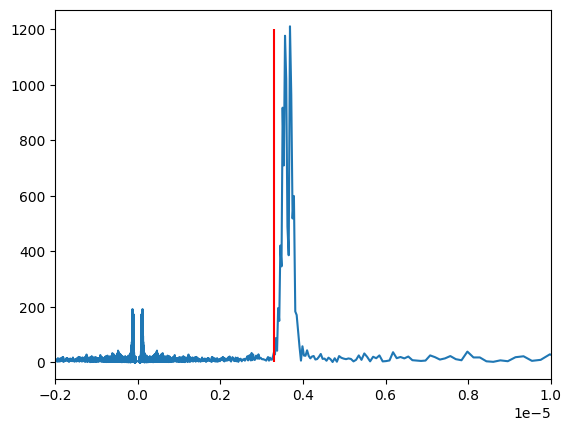

In [4]:
freq_scale = 2/5.127868608985219*1e-3

intensity = data[1]
position  = data[0]*freq_scale


intensity -= np.mean(intensity)


freqs = np.fft.fftfreq(len(intensity), d=((np.mean(np.diff(position)))))
fft_int = np.fft.fft(intensity)


peak_idx = np.argmax(np.abs(fft_int))
peak_freq = freqs[peak_idx]


print(f"Wavelength: {1/peak_freq} m")

freqs = 1/freqs

plt.plot(freqs, np.abs(fft_int))
plt.xlim(-2e-6,1e-5)
plt.vlines(3.31e-6,0,1200,colors="r")

In [5]:
dat = [freqs, np.abs(fft_int)]

sorted_indices = sorted(range(len(dat[0])), key=lambda k: dat[0][k])

dat_sorted = [[dat[0][i], dat[1][i]] for i in sorted_indices]

dat_sorted = np.array(dat_sorted).T

[[Model]]
    Model(gaussian)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 29
    # data points      = 132
    # variables        = 3
    chi-square         = 1008759.97
    reduced chi-square = 7819.84472
    Akaike info crit   = 1186.26882
    Bayesian info crit = 1194.91723
    R-squared          = 0.84895705
[[Variables]]
    amplitude:  3.0239e-04 +/- 1.2728e-05 (4.21%) (init = 0.0003775957)
    center:     3.6271e-06 +/- 6.3259e-09 (0.17%) (init = 3.604374e-06)
    sigma:      1.3002e-07 +/- 6.4728e-09 (4.98%) (init = 1.041552e-07)
    fwhm:       3.0617e-07 +/- 1.5242e-08 (4.98%) == '2.3548200*sigma'
    height:     927.853922 +/- 39.7197064 (4.28%) == '0.3989423*amplitude/max(1e-15, sigma)'
[[Correlations]] (unreported correlations are < 0.100)
    C(amplitude, sigma) = 0.577


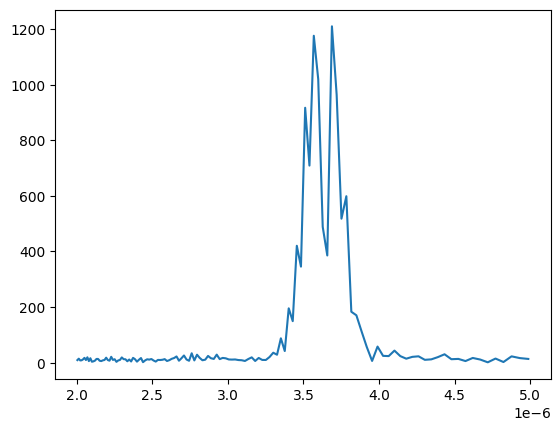

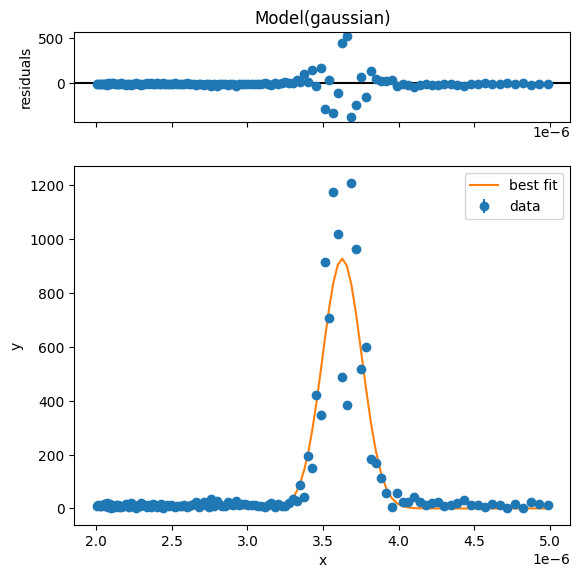

In [6]:
von,bis = f.pos(dat_sorted[0],0.2e-5),f.pos(dat_sorted[0],0.5e-5)

plt.plot(dat_sorted[0,von:bis],dat_sorted[1,von:bis])

fillerr = np.full(len(dat_sorted[0,von:bis]),1)

res = f.gausfit(dat_sorted[1,von:bis],dat_sorted[0,von:bis],fillerr)

res.plot()

print(res.fit_report())

In [26]:
#1/e breite
print('1/e Breite')
eb3 = res.params["fwhm"].value/ (2*np.log(2)**0.5)*2
print(eb3)
print('1/e höhe')
print(res.params['height'].value/m.e)
print('Kontrolle 1/e breite in fit eingesetzt')
print(res.eval(x=res.params['center'].value-eb3/2))

1/e Breite
3.6774487437653456e-07
1/e höhe
341.3383822488867
Kontrolle 1/e breite in fit eingesetzt
341.3383785349351
